# Programming Assignment 2 - Neural Networks

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf

## 1) Implementing neural networks from scratch

In [7]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
def sigmoid_derivative (z) :
    return sigmoid(z) * (1.0 - sigmoid(z))

In [8]:
def train(X, y, n_hidden, learning_rate, n_iter):
    m, n_input = X. shape
    W1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros ((1, n_hidden) )
    W2 = np. random. rand(n_hidden, 1)
    b2 = np.zeros ((1, 1))
    for i in range (1, n_iter+1):
        Z2 = np. matmul (X, W1) + b1
        A2 = sigmoid (Z2)
        Z3 = np .matmul (A2, W2) + b2
        A3 = Z3
        dZ3 = A3 - y
        dw2 = np.matmul (A2.T, dZ3)
        db2 = np. sum(dZ3, axis=0, keepdims=True)
        dz2 = np.matmul (dZ3, W2.T) * sigmoid_derivative (Z2)
        dW1 = np. matmul(X. T, dz2)
        db1 = np. sum(dz2, axis=0)
        W2 = W2 - learning_rate * dw2 / m
        b2 = b2 - learning_rate * db2 / m
        W1= W1-learning_rate* dW1 / m
        b1 = b1 - learning_rate * db1 / m
        if i % 100 == 0:
            cost = np.mean ((y - A3) ** 2)
            print('Iteration %i, training loss: %f' %(i, cost))
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [9]:
from sklearn import datasets
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [10]:
#boston = datasets.load_boston()
num_test = 10 # the last 10 samples as testing set
from sklearn import preprocessing
scaler = preprocessing.StandardScaler( )
X_train = data[:-num_test,:]
X_train = scaler.fit_transform(X_train)
y_train = target[:-num_test].reshape(-1, 1)
X_test = data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = target[-num_test:]

In [11]:
n_hidden = 20
learning_rate = 0.1
n_iter = 2000
model = train(X_train, y_train, n_hidden, learning_rate, n_iter)

Iteration 100, training loss: 13.506485
Iteration 200, training loss: 9.190941
Iteration 300, training loss: 7.714915
Iteration 400, training loss: 6.859231
Iteration 500, training loss: 6.260600
Iteration 600, training loss: 5.793723
Iteration 700, training loss: 5.400577
Iteration 800, training loss: 5.065822
Iteration 900, training loss: 4.780076
Iteration 1000, training loss: 4.528041
Iteration 1100, training loss: 4.211527
Iteration 1200, training loss: 3.962658
Iteration 1300, training loss: 3.768816
Iteration 1400, training loss: 3.592533
Iteration 1500, training loss: 3.433316
Iteration 1600, training loss: 3.290921
Iteration 1700, training loss: 3.163021
Iteration 1800, training loss: 3.047106
Iteration 1900, training loss: 2.941643
Iteration 2000, training loss: 2.845994


In [12]:
def predict(x, model) :
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    A2 = sigmoid(np.matmul(x, W1) + b1)
    A3 = np. matmul (A2, W2) + b2
    return A3

In [13]:
predictions = predict (X_test, model)

In [14]:
print(predictions)

[[18.17164233]
 [19.70994739]
 [21.25668426]
 [19.53710962]
 [19.47857154]
 [26.59156329]
 [24.13277713]
 [25.20210135]
 [24.03196183]
 [22.9437824 ]]


In [15]:
print(y_test)

[19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


## 2) Implementing neural networks with scikit-learn

In [16]:
from sklearn.neural_network import MLPRegressor
nn_scikit = MLPRegressor(hidden_layer_sizes=(16, 8),activation='relu',
                         solver= 'adam', learning_rate_init=0.001, random_state=42, max_iter=2000)

In [17]:
nn_scikit.fit(X_train, y_train)
predictions = nn_scikit.predict(X_test)
print (predictions)

C:\Users\Kaushik Reddy\Downloads\New folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16.79582331 18.55538023 21.07961496 19.21362606 18.50955771 23.5608387
 22.27916529 27.11909153 24.70251262 22.05522035]


C:\Users\Kaushik Reddy\Downloads\New folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
print(np. mean ( (y_test - predictions) ** 2))

13.933482332708788


## 3) Implementing neural networks with TensorFlow

In [19]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [20]:
model = keras.Sequential([keras.layers.Dense(units=20, activation='relu'),
                           keras.layers.Dense(units=8, activation='relu'),keras.layers. Dense(units=1)])

In [21]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam (0.02))

In [22]:
 model.fit(X_train, y_train, epochs=300)

Epoch 1/300
16/16 [==============================] - 2s 7ms/step - loss: 319.1026
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 56.6185
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 25.3877
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 18.4594
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 15.6632
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 14.6758
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 12.7093
Epoch 8/300
16/16 [==============================] - 0s 5ms/step - loss: 13.6715
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 12.1518
Epoch 10/300
16/16 [==============================] - 0s 5ms/step - loss: 11.1191
Epoch 11/300
16/16 [==============================] - 0s 5ms/step - loss: 10.8551
Epoch 12/300
16/16 [==============================] - 0s 5ms/step - loss: 10.7223
Epoch 13/300
16/16 [====

In [23]:
predictions = model.predict(X_test)[:, 0]
print(predictions)

1/1 [==============================] - 0s 254ms/step
[17.555374 20.327778 22.85768  21.021574 20.674183 25.908714 23.664745
 25.943966 24.68386  22.00179 ]


In [24]:
print(np.mean((y_test - predictions) ** 2))

17.400076881151033


## 4) Picking the right activation functions

## 5) Preventing overfitting in neural networks

In [25]:
model = keras.Sequential([keras.layers.Dense(units=32, activation='relu'),
                           tf.keras.layers.Dropout(0.5), keras.layers.Dense(units=1)])

## 6) Predicting stock prices with neural networks

In [29]:
mydata = pd.read_csv("20051201_20051210-1.csv",index_col='Date')
mydata

,Open,High,Low,Close,Volume
Date,,,,,
2005-12-01,10806.0,10934.9,10806.0,10912.6,256932865
2005-12-02,10912.0,10921.4,10861.7,10877.5,214888854
2005-12-05,10877.0,10877.0,10810.7,10835.0,237430947
2005-12-06,10835.4,10936.2,10835.4,10856.9,264721465
2005-12-07,10856.9,10868.1,10764.0,10810.9,243543206
2005-12-08,10808.4,10847.2,10729.7,10755.1,253313750
2005-12-09,10751.8,10806.0,10729.9,10778.6,238907145


In [30]:
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1']= df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_ 1'] = df['Low'].shift(1)
    df_new['volume 1'] = df['Volume'].shift(1)

In [31]:
def add_avg_price(df,df_new):
    df_new['avg_price_5']   = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30']  = df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df ['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']

In [32]:
def add_avg_volume(df,df_new):
    df_new['avg_volume_5'] =  df['Volume'].rolling(5).mean().shift (1)
    df_new['avg_volume_30'] =  df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

In [33]:
def add_std_price(df,df_new):
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift (1)
    df_new['ratio_std_price_5_30'] =df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std price_5_365'] =df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] =df_new['std_price_30'] / df_new['std_price_365']

In [34]:
def add_std_volume(df,df_new):
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume' ].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

In [35]:
def  add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift (1)) / df['Close'].shift(1)).shift (1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift (5))/ df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift (21)) / df['Close'].shift(21)).shift (1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift (1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling (21).mean().shift (1)
    df_new[ 'moving_avg 365'] = df_new['return_1'].rolling(252).mean().shift(1)

In [36]:
def generate_features(df):

    df_new = pd.DataFrame()
    add_original_feature(df,df_new)
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df,df_new)
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

In [37]:
data_raw = pd.read_csv("19880101_20191231-1.csv", index_col= 'Date')
data = generate_features(data_raw)

In [38]:
print(data.round(decimals=3).head(5))

              open  open_1  close_1  high_1  low_ 1    volume 1  avg_price_5  \
Date                                                                           
1989-01-04  2146.6  2168.4   2144.6  2168.4  2127.1  17302883.0      2165.00   
1989-01-05  2177.7  2146.6   2177.7  2183.4  2146.6  15714720.0      2168.00   
1989-01-06  2190.5  2177.7   2190.5  2205.2  2173.0  20303094.0      2172.82   
1989-01-09  2194.3  2190.5   2194.3  2213.8  2182.3  16494441.0      2175.14   
1989-01-10  2199.5  2194.3   2199.5  2209.1  2185.0  18410324.0      2181.32   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1989-01-04      2150.624       2062.113                 1.007  ...   
1989-01-05      2154.690       2062.668                 1.006  ...   
1989-01-06      2157.867       2063.218                 1.007  ...   
1989-01-09      2160.005       2064.341                 1.007  ...   
1989-01-10      216

## Training a simple neural network

In [39]:
data_raw = pd.read_csv('19880101_20191231-1.csv', index_col='Date')
data = generate_features(data_raw)

In [40]:
start_train = '1988-01-01'
end_train = '2018-12-31'
start_test = '2019-01-01'
end_test = '2019-12-31'
data_train = data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
data_test = data.loc[start_test:end_test]
X_test = data_test.drop('close', axis=1) . values
y_test = data_test['close'].values

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ( )

In [42]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([Dense(units=32, activation='relu'),Dense(units=1)])

In [44]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

In [45]:
model.fit(X_scaled_train, y_train, epochs=100, verbose=True)

Epoch 1/100
237/237 [==============================] - 3s 5ms/step - loss: 32921882.0000
Epoch 2/100
237/237 [==============================] - 1s 4ms/step - loss: 2021253.3750
Epoch 3/100
237/237 [==============================] - 1s 4ms/step - loss: 518923.5312
Epoch 4/100
237/237 [==============================] - 1s 4ms/step - loss: 170616.3906
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 73549.2969
Epoch 6/100
237/237 [==============================] - 1s 4ms/step - loss: 42636.1172
Epoch 7/100
237/237 [==============================] - 1s 4ms/step - loss: 31346.8086
Epoch 8/100
237/237 [==============================] - 1s 4ms/step - loss: 26128.1230
Epoch 9/100
237/237 [==============================] - 1s 5ms/step - loss: 24498.5840
Epoch 10/100
237/237 [==============================] - 1s 5ms/step - loss: 23540.2598
Epoch 11/100
237/237 [==============================] - 1s 5ms/step - loss: 26442.5391
Epoch 12/100
237/237 [=======================

In [47]:
#Predictions
predictions = model.predict(X_scaled_test)
print(predictions)

8/8 [==============================] - 0s 6ms/step
[[23639.715]
 [23651.137]
 [23179.16 ]
 [23831.074]
 [23920.95 ]
 [24159.605]
 [24188.596]
 [24321.39 ]
 [24329.902]
 [24288.814]
 [24472.875]
 [24582.617]
 [24786.148]
 [25029.555]
 [24802.102]
 [24973.453]
 [24937.574]
 [25049.113]
 [24829.57 ]
 [25012.395]
 [25339.41 ]
 [25248.504]
 [25378.   ]
 [25536.475]
 [25734.264]
 [25682.574]
 [25494.71 ]
 [25486.51 ]
 [25514.13 ]
 [25851.873]
 [25935.322]
 [25852.855]
 [26250.07 ]
 [26290.225]
 [26345.492]
 [26272.45 ]
 [26493.842]
 [26549.957]
 [26479.799]
 [26411.457]
 [26367.484]
 [26497.613]
 [26251.67 ]
 [26244.973]
 [26118.531]
 [25867.895]
 [25772.656]
 [25971.41 ]
 [25990.203]
 [26103.855]
 [26120.406]
 [26085.438]
 [26239.902]
 [26245.033]
 [26069.32 ]
 [26229.664]
 [25931.984]
 [25998.896]
 [26131.818]
 [26089.89 ]
 [26162.586]
 [26419.951]
 [26717.33 ]
 [26651.64 ]
 [26691.352]
 [26847.957]
 [26863.777]
 [26753.676]
 [26634.234]
 [26680.021]
 [26712.908]
 [26844.242]
 [26830.205]


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'MSE: {mean_squared_error(y_test,predictions) :.3f}')

print(f'MAE: {mean_absolute_error(y_test, predictions):.3f}')

print(f'R^2: {r2_score(y_test, predictions) : .3f}')


MSE: 228358.915
MAE: 433.389
R^2:  0.803


## Fine-tuning the neural network

In [49]:
from tensorboard.plugins.hparams import api as hp

HP_HIDDEN = hp.HParam('hidden_size', hp.Discrete([64, 32, 16]))
HP_EPOCHS = hp.HParam('epochs', hp.Discrete([300, 1000]))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.RealInterval (0.01, 0.4))

def train_test_model(hparams, logdir):
    model = Sequential([Dense(units=hparams[HP_HIDDEN], activation='relu'),Dense(units=1)])
    model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(hparams[HP_LEARNING_RATE]),
                  metrics=['mean_squared_error'])
    model.fit(X_scaled_train, y_train,validation_data=(X_scaled_test, y_test),
              epochs=hparams[HP_EPOCHS],verbose=False,
              callbacks=[tf.keras.callbacks.TensorBoard(logdir),
              hp.KerasCallback(logdir,hparams),
              tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',min_delta=0,patience=200, verbose=0,
                                                 mode='auto')])
    mse = model.evaluate(X_scaled_test, y_test)[0]
    pred = model.predict(X_scaled_test)
    r2 = r2_score (y_test, pred)
    return mse, r2



def run(hparams, logdir):
    with tf.summary.create_file_writer(logdir).as_default():
        hp.hparams_config(hparams=[HP_HIDDEN, HP_EPOCHS, HP_LEARNING_RATE],
                          metrics=[hp.Metric('mean_squared_error', display_name='mse'),
                                   hp.Metric('r2', display_name='r2')])
        mse, r2 = train_test_model(hparams, logdir)
        tf.summary.scalar('mean_squared_error', mse, step=1)
        tf.summary.scalar('r2', r2, step=1)

session_num = 0
for hidden in HP_HIDDEN.domain.values:
    for epochs in HP_EPOCHS.domain.values:
        for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value, HP_LEARNING_RATE.domain.max_value, num=10):
            hparams = {HP_HIDDEN: hidden,
                       HP_EPOCHS: epochs,
                       HP_LEARNING_RATE: float("%.2f" % float(learning_rate)),
                      }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run(hparams, 'logs/hparam_tuning/' + run_name)
            session_num += 1


--- Starting trial: run-0
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.01}
8/8 [==============================] - 0s 2ms/step
--- Starting trial: run-1
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.05}
8/8 [==============================] - 0s 2ms/step
--- Starting trial: run-2
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.1}
8/8 [==============================] - 0s 3ms/step
--- Starting trial: run-3
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.14}
8/8 [==============================] - 0s 2ms/step
--- Starting trial: run-4
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.18}
8/8 [==============================] - 0s 2ms/step
--- Starting trial: run-5
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.23}
8/8 [==============================] - 0s 3ms/step
--- Starting trial: run-6
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.27}
8/8 [==============================] - 0s 2ms/step
--- Starting trial: run-7
{'hidden_size': 16, 'epochs': 

In [50]:
import tensorflow as tf

# Set up log directory for your model
log_dir = "logs/hparam_tuning"

# Create a summary writer
summary_writer = tf.summary.create_file_writer(log_dir)

# Launch TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
tensorboard_callback.set_model(model)  # Optional: write graph summary
tensorboard_callback.on_train_end(None)  # Optional: write final metrics


In [51]:
from tensorboard import program
import webbrowser
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', 'logs/'])
tb.launch()
webbrowser.open_new_tab('http://localhost:6006')

True

In [52]:
model = Sequential([Dense (units=16, activation='relu'),Dense (units=1)])
model.compile (loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.21))
model.fit(X_scaled_train, y_train, epochs=1000, verbose=False)
predictions = model.predict(X_scaled_test)[:, 0]

8/8 [==============================] - 0s 2ms/step


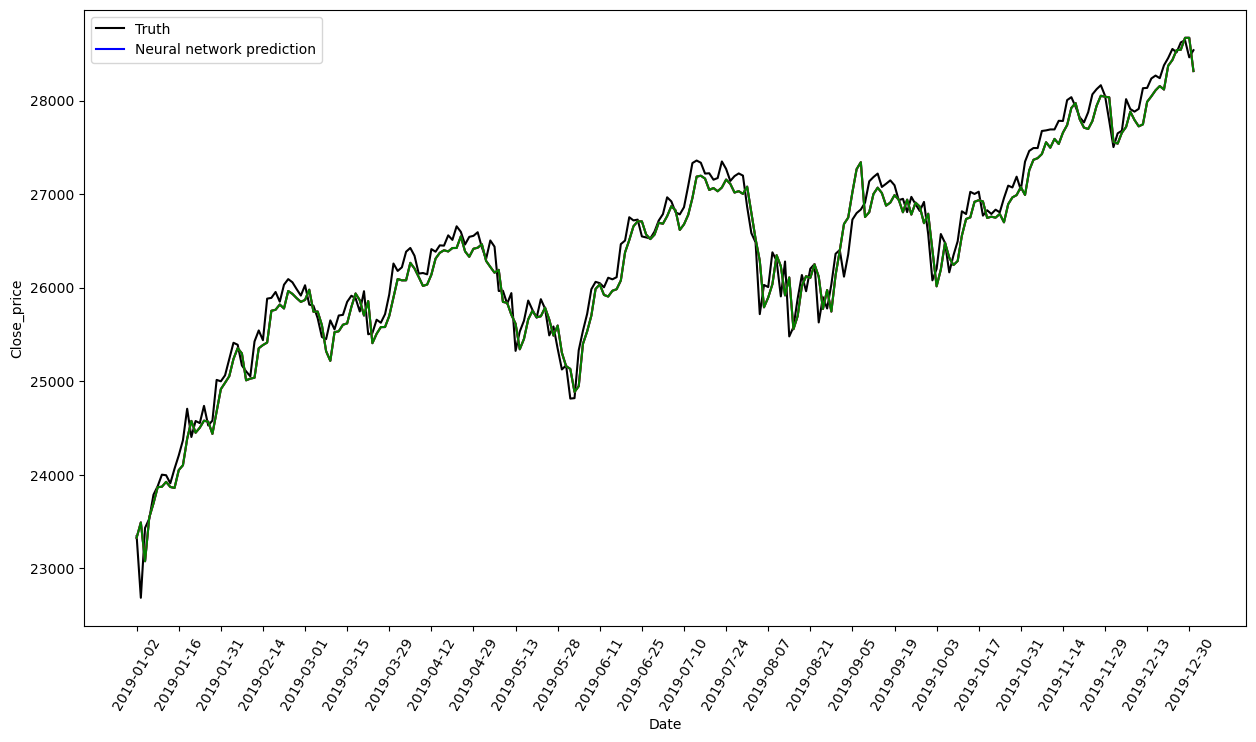

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions, c='b')
plt.plot(data_test.index, predictions, c='r')
plt.plot(data_test.index, predictions, c='g')
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel("Close_price")
plt.legend(['Truth','Neural network prediction'])
plt.show()